<a href="https://colab.research.google.com/github/vaibhavkush/YhillsProject/blob/main/TaxifarePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians,asin
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster
from geopy.distance import great_circle
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from geopy.distance import geodesic

In [ ]:
train=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
train.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
train['date_time_of_pickup']=pd.to_datetime(train['date_time_of_pickup'],format='%Y-%m-%d %H:%M:%S UTC')
train.head()


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train['date_of_pickup']= train['date_time_of_pickup'].dt.date
train['day_of_pickup']=train['date_time_of_pickup'].apply(lambda x:x.day)
train['hour_of_pickup']=train['date_time_of_pickup'].apply(lambda x:x.hour)
train['day_of_week_of_pickup']=train['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
train['month_of_pickup']=train['date_time_of_pickup'].apply(lambda x:x.month)
train['year_of_pickup']=train['date_time_of_pickup'].apply(lambda x:x.year)

In [ ]:
train[pd.isnull(train)].sum()

unique_id                0  
amount                   0.0
longitude_of_pickup      0.0
latitude_of_pickup       0.0
longitude_of_dropoff     0.0
latitude_of_dropoff      0.0
no_of_passenger          0.0
date_of_pickup           0  
day_of_pickup            0.0
hour_of_pickup           0.0
day_of_week_of_pickup    0  
month_of_pickup          0.0
year_of_pickup           0.0
dtype: object

Text(0.5, 1.0, 'Distribution of Trip Fare')

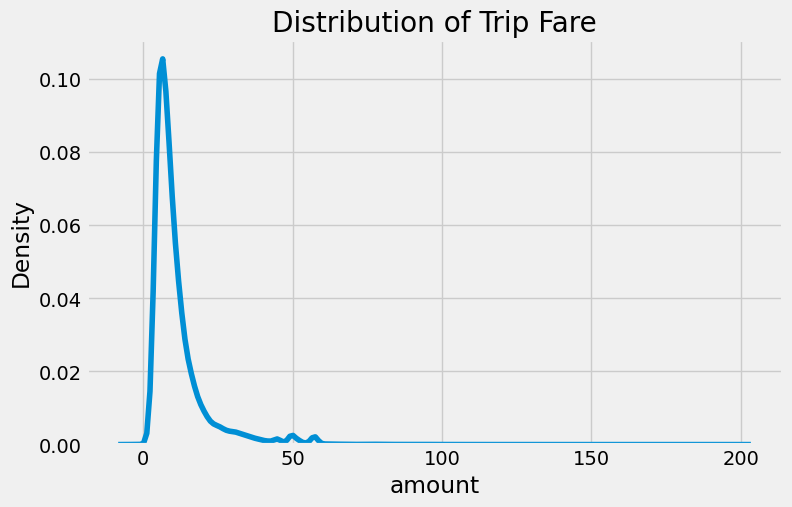

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(train['amount']).set_title("Distribution of Trip Fare")

In [ ]:
train.loc[train['amount']<0].shape

(6, 14)

In [ ]:
train=train.loc[train['amount']>=0]
train.shape

(49994, 14)

Text(0.5, 1.0, 'Distribution of fare amount (log scale)')

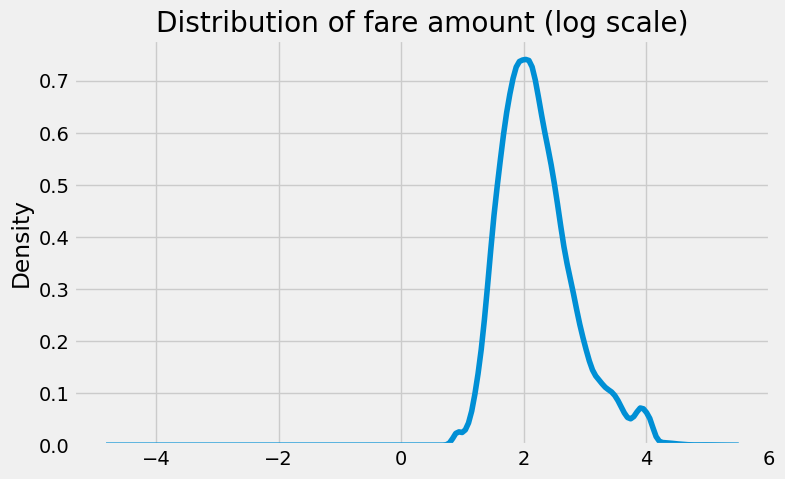

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(train['amount'].values)).set_title("Distribution of fare amount (log scale)")

In [ ]:
print("Range of Pickup Latitude is ", (min(train['latitude_of_pickup']),max(train['latitude_of_pickup'])))

Range of Pickup Latitude is  (-74.006893, 401.083332)


In [ ]:
print("Range of Dropoff Latitude is ", (min(train['latitude_of_dropoff']),max(train['longitude_of_dropoff'])))

Range of Dropoff Latitude is  (-74.006377, 40.851027)


In [ ]:
test=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
print("Longitude Boundary in test data")
min(test.longitude_of_pickup.min(), test.longitude_of_dropoff.min()),max(test.longitude_of_pickup.max(), test.longitude_of_dropoff.max())

Longitude Boundary in test data


(-84.654241, 40.851027)

In [ ]:
print("Latitude Boundary in test data")
min(test.latitude_of_pickup.min(), test.latitude_of_pickup.min()),max(test.latitude_of_pickup.max(), test.latitude_of_pickup.max())

Latitude Boundary in test data


(-74.006893, 401.083332)

In [ ]:
boundary={'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

In [ ]:
train[(train.latitude_of_pickup==0) | (train.longitude_of_pickup)==0 | (train.latitude_of_dropoff==0)|(train.longitude_of_dropoff==0)].shape

(957, 14)

In [ ]:
train.loc[~((train.longitude_of_pickup >= boundary['min_lng'] ) & (train.longitude_of_pickup <= boundary['max_lng']) &
            (train.latitude_of_pickup >= boundary['min_lat']) & (train.latitude_of_pickup <= boundary['max_lat']) &
            (train.longitude_of_dropoff >= boundary['min_lng']) & (train.longitude_of_dropoff <= boundary['max_lng']) &
            (train.latitude_of_dropoff >=boundary['min_lat']) & (train.latitude_of_dropoff <= boundary['max_lat'])),'is_outlier_loc']=1
train.loc[((train.longitude_of_pickup >= boundary['min_lng'] ) & (train.longitude_of_pickup <= boundary['max_lng']) &
            (train.latitude_of_pickup >= boundary['min_lat']) & (train.latitude_of_pickup <= boundary['max_lat']) &
            (train.longitude_of_dropoff >= boundary['min_lng']) & (train.longitude_of_dropoff <= boundary['max_lng']) &
             (train.latitude_of_dropoff >=boundary['min_lat']) & (train.latitude_of_dropoff <= boundary['max_lat'])),'is_outlier_loc']=0

print("Outlier vs Non Outlier Counts")
print(train['is_outlier_loc'].value_counts())

train=train.loc[train['is_outlier_loc']==0]
train.drop(['is_outlier_loc'],axis=1,inplace=True)


Outlier vs Non Outlier Counts
0.0    48922
1.0    1072 
Name: is_outlier_loc, dtype: int64


(-74.03, -73.75)

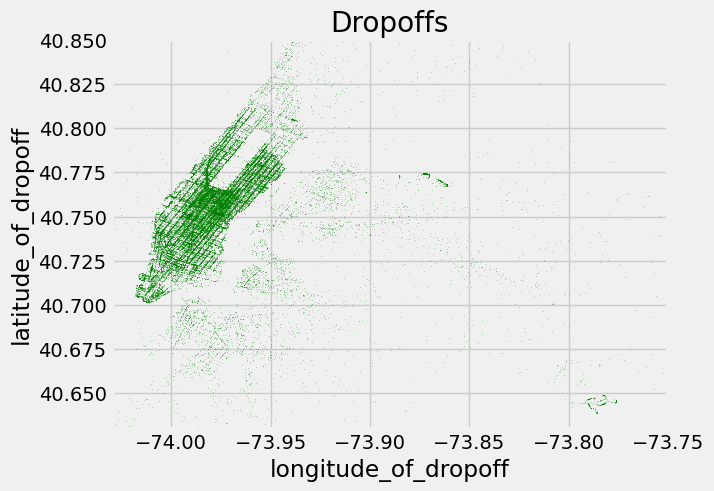

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

train.plot(kind='scatter', x='longitude_of_dropoff', y='latitude_of_dropoff',
                color='green', 
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

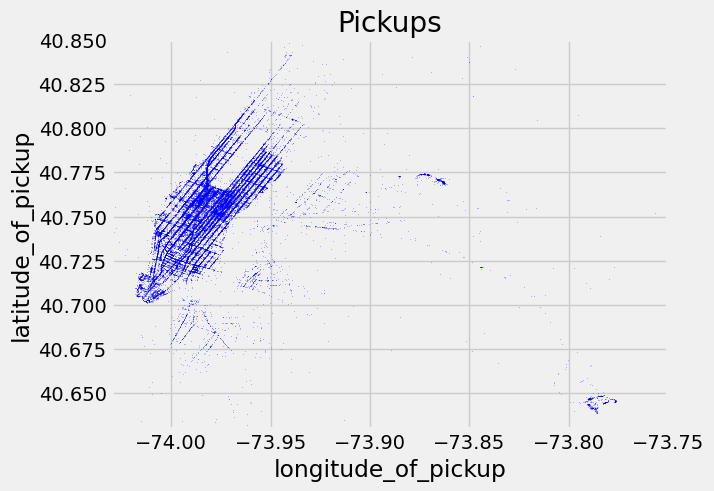

In [ ]:
train.plot(kind='scatter', x='longitude_of_pickup', y='latitude_of_pickup',
                color='blue', 
                s=.02, alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [ ]:
train['latitude_of_pickup_round3']=train['latitude_of_pickup'].apply(lambda x:round(x,3))
train['longitude_of_pickup_round3']=train['longitude_of_pickup'].apply(lambda x:round(x,3))
train['latitude_of_dropoff_round3']=train['latitude_of_dropoff'].apply(lambda x:round(x,3))
train['longitude_of_dropoff_round3']=train['longitude_of_dropoff'].apply(lambda x:round(x,3))

In [ ]:
pickup_fare_amount=train.groupby(['latitude_of_pickup_round3','longitude_of_pickup_round3'])['amount'].mean().reset_index().rename(columns={'amount':'avg_fare'})
pickup_fare_amount.head()

,latitude_of_pickup_round3,longitude_of_pickup_round3,avg_fare
0,40.580,-73.960,6.5
1,40.588,-73.961,4.5
2,40.592,-73.986,5.3
3,40.604,-74.002,33.3
4,40.604,-73.979,8.9


In [ ]:
JFK={'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659}
JFK_center=[40.6437,-73.7900]

JFK_data=train.loc[(train.latitude_of_pickup>=JFK['min_lat']) & (train.latitude_of_pickup<=JFK['max_lat'])]
JFK_data=JFK_data.loc[(train.longitude_of_pickup>=JFK['min_lng']) & (train.longitude_of_pickup<=JFK['max_lng'])]

print("Number of Trips with Pickups from JFK",JFK_data.shape[0])

JFK_dropoff=train.loc[(train.latitude_of_dropoff>=JFK['min_lat']) & (train.latitude_of_dropoff<=JFK['max_lat'])]
JFK_dropoff=JFK_dropoff.loc[(train.longitude_of_dropoff>=JFK['min_lng']) & (train.longitude_of_dropoff<=JFK['max_lng'])]

print("Number of Trips with Dropoffs to JFK",JFK_dropoff.shape[0])

Number of Trips with Pickups from JFK 745
Number of Trips with Dropoffs to JFK 397


Text(0.5, 1.0, 'Fare Amount Distribution')

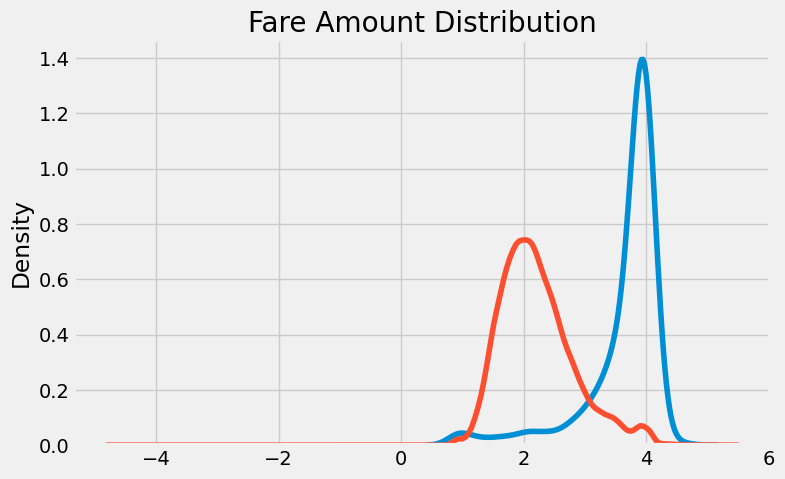

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(JFK_data['amount'].values),label='JFK Pickups')
#sns.kdeplot(np.log(JFK_dropoff['amount'].values),label='JFK Dropoff')
sns.kdeplot(np.log(train['amount'].values),label='All Trips in Train data')
plt.title("Fare Amount Distribution")

Text(0.5, 1.0, 'Dropoffs vs Fare Amount')

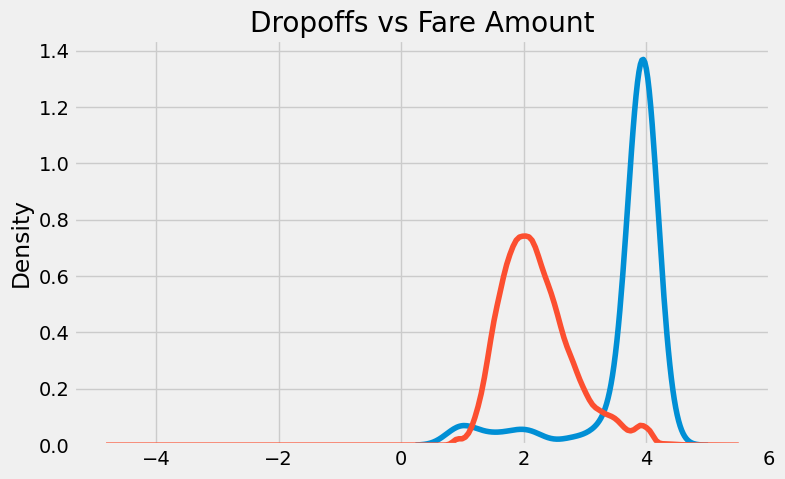

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(JFK_dropoff['amount'].values),label='JFK')
sns.kdeplot(np.log(train['amount'].values),label='train')
plt.title("Dropoffs vs Fare Amount")

In [ ]:
del JFK_data
del JFK
del JFK_dropoff

In [ ]:
nyc_airports={'JFK':{'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659},
              
    'EWR':{'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081

        },
    'LaGuardia':{'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931
        
    }
 
}
def isAirport(latitude,longitude,airport_name='JFK'):
    
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0
               

In [ ]:
train['is_pickup_JFK']=train.apply(lambda row:isAirport(row['latitude_of_pickup'],row['longitude_of_pickup'],'JFK'),axis=1)
train['is_dropoff_JFK']=train.apply(lambda row:isAirport(row['latitude_of_dropoff'],row['longitude_of_dropoff'],'JFK'),axis=1)

In [ ]:
train['is_pickup_EWR']=train.apply(lambda row:isAirport(row['latitude_of_pickup'],row['longitude_of_pickup'],'EWR'),axis=1)
train['is_dropoff_EWR']=train.apply(lambda row:isAirport(row['latitude_of_dropoff'],row['longitude_of_dropoff'],'EWR'),axis=1)

In [ ]:
train['is_pickup_la_guardia']=train.apply(lambda row:isAirport(row['latitude_of_pickup'],row['longitude_of_pickup'],'LaGuardia'),axis=1)
train['is_dropoff_la_guardia']=train.apply(lambda row:isAirport(row['latitude_of_dropoff'],row['longitude_of_dropoff'],'LaGuardia'),axis=1)

In [ ]:
###trip distance

In [ ]:
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
train['trip_distance']=train.apply(lambda row:distance(row['latitude_of_pickup'],row['latitude_of_dropoff'],row['longitude_of_pickup'],row['longitude_of_dropoff']),axis=1)

Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

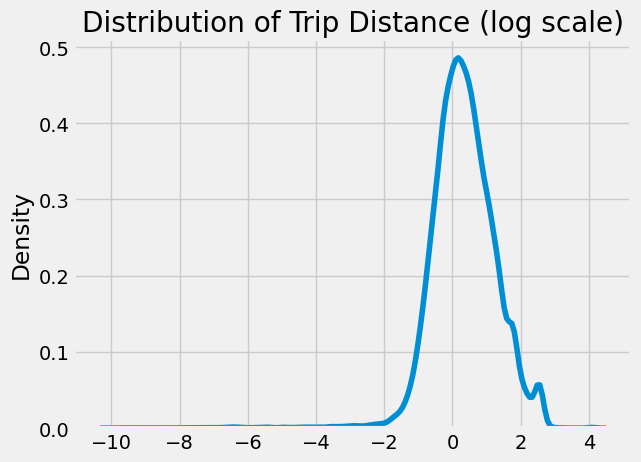

In [ ]:
sns.kdeplot(np.log(train['trip_distance'].values)).set_title("Distribution of Trip Distance (log scale)")

Text(0.5, 1.0, 'Trip Distance vs Fare Amount')

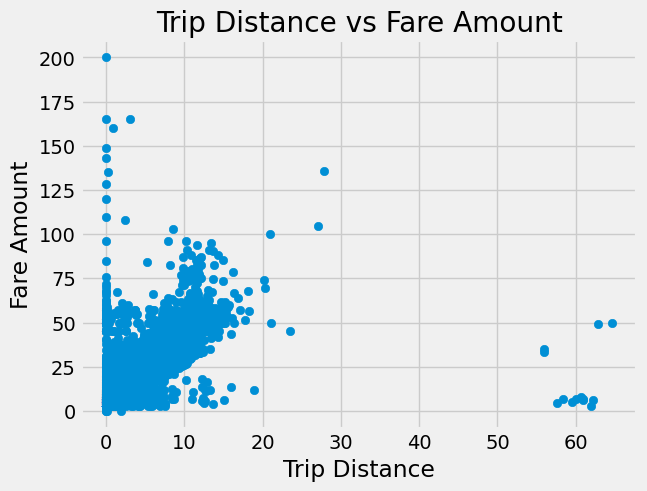

In [ ]:
plt.scatter(x=train['trip_distance'],y=train['amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

In [ ]:
non_airport=train.loc[(train['is_dropoff_JFK']==0) & (train['is_dropoff_EWR']==0) & (train['is_dropoff_la_guardia']==0)]
non_airport=non_airport.loc[(non_airport['is_pickup_JFK']==0) & (non_airport['is_pickup_EWR']==0) & (non_airport['is_pickup_la_guardia']==0)]
non_airport.shape

(46176, 25)

Text(0.5, 1.0, 'Trip Distance vs Fare Amount (excluding airport rides)')

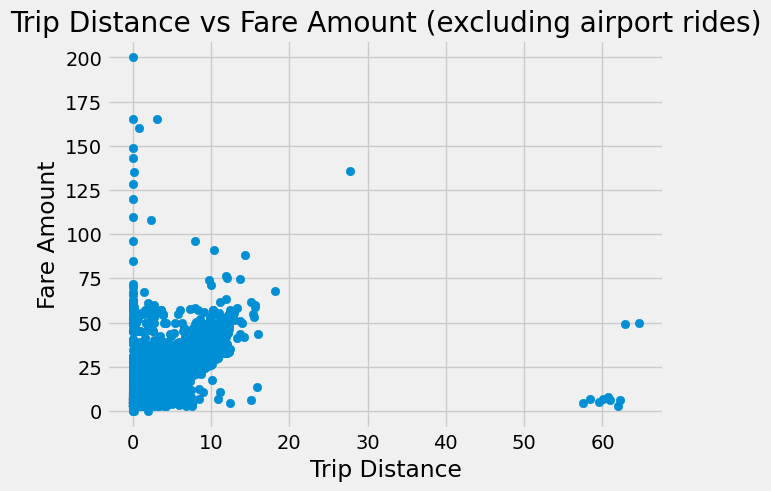

In [ ]:
plt.scatter(x=non_airport['trip_distance'],y=non_airport['amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount (excluding airport rides)")

In [ ]:
non_airport_long_trips=non_airport[non_airport['trip_distance']>=50]

In [ ]:
drop_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 12,)

#print(pickup.shape)
### For each pickup point add a circlemarker

for index, row in non_airport_long_trips.iterrows():
    
    folium.CircleMarker([row['latitude_of_dropoff_round3'], row['longitude_of_dropoff_round3']],
                        radius=3,
                        
                        color="#008000", 
                        fill_opacity=0.9
                       ).add_to(drop_map)
for index, row in non_airport_long_trips.iterrows():
    
    folium.CircleMarker([row['latitude_of_pickup_round3'], row['longitude_of_pickup_round3']],
                        radius=3,
                        
                        color="blue", 
                        fill_opacity=0.9
                       ).add_to(drop_map)
drop_map

In [ ]:
### Most of the long trips dropoffs and pickups are in lower Manhattan. There are a lot of dropoffs in Brooklyn

### New York city is divided into 7 Boroughs. Let us calculate which borough pickup and dropoff points are. And whether that effects the fare

In [ ]:
nyc_boroughs={
    'manhattan':{
        'min_lng':-74.0479,
        'min_lat':40.6829,
        'max_lng':-73.9067,
        'max_lat':40.8820
    },
    
    'queens':{
        'min_lng':-73.9630,
        'min_lat':40.5431,
        'max_lng':-73.7004,
        'max_lat':40.8007

    },

    'brooklyn':{
        'min_lng':-74.0421,
        'min_lat':40.5707,
        'max_lng':-73.8334,
        'max_lat':40.7395

    },

    'bronx':{
        'min_lng':-73.9339,
        'min_lat':40.7855,
        'max_lng':-73.7654,
        'max_lat':40.9176

    },

    'staten_island':{
        'min_lng':-74.2558,
        'min_lat':40.4960,
        'max_lng':-74.0522,
        'max_lat':40.6490

    }
    
    
    
}

In [ ]:
def getBorough(lat,lng):
    
    locs=nyc_boroughs.keys()
    for loc in locs:
        if lat>=nyc_boroughs[loc]['min_lat'] and lat<=nyc_boroughs[loc]['max_lat'] and lng>=nyc_boroughs[loc]['min_lng'] and lng<=nyc_boroughs[loc]['max_lng']:
            return loc
    return 'others'


In [ ]:
train['pickup_borough']=train.apply(lambda row:getBorough(row['latitude_of_pickup'],row['longitude_of_pickup']),axis=1)
train['dropoff_borough']=train.apply(lambda row:getBorough(row['latitude_of_dropoff'],row['longitude_of_dropoff']),axis=1)


In [ ]:
train.to_csv("Training_FeatureEngineering.csv",index=False)
del train

Text(0.5, 1.0, 'Distribution of Pickup Boroughs')

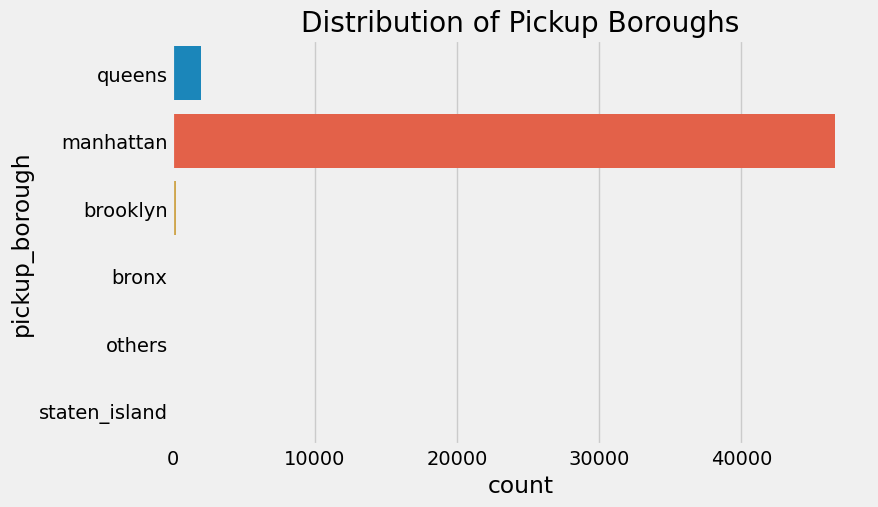

In [ ]:
train=pd.read_csv("Training_FeatureEngineering.csv")
plt.figure(figsize=(8,5))
sns.countplot(y=train['pickup_borough'])
plt.title("Distribution of Pickup Boroughs")

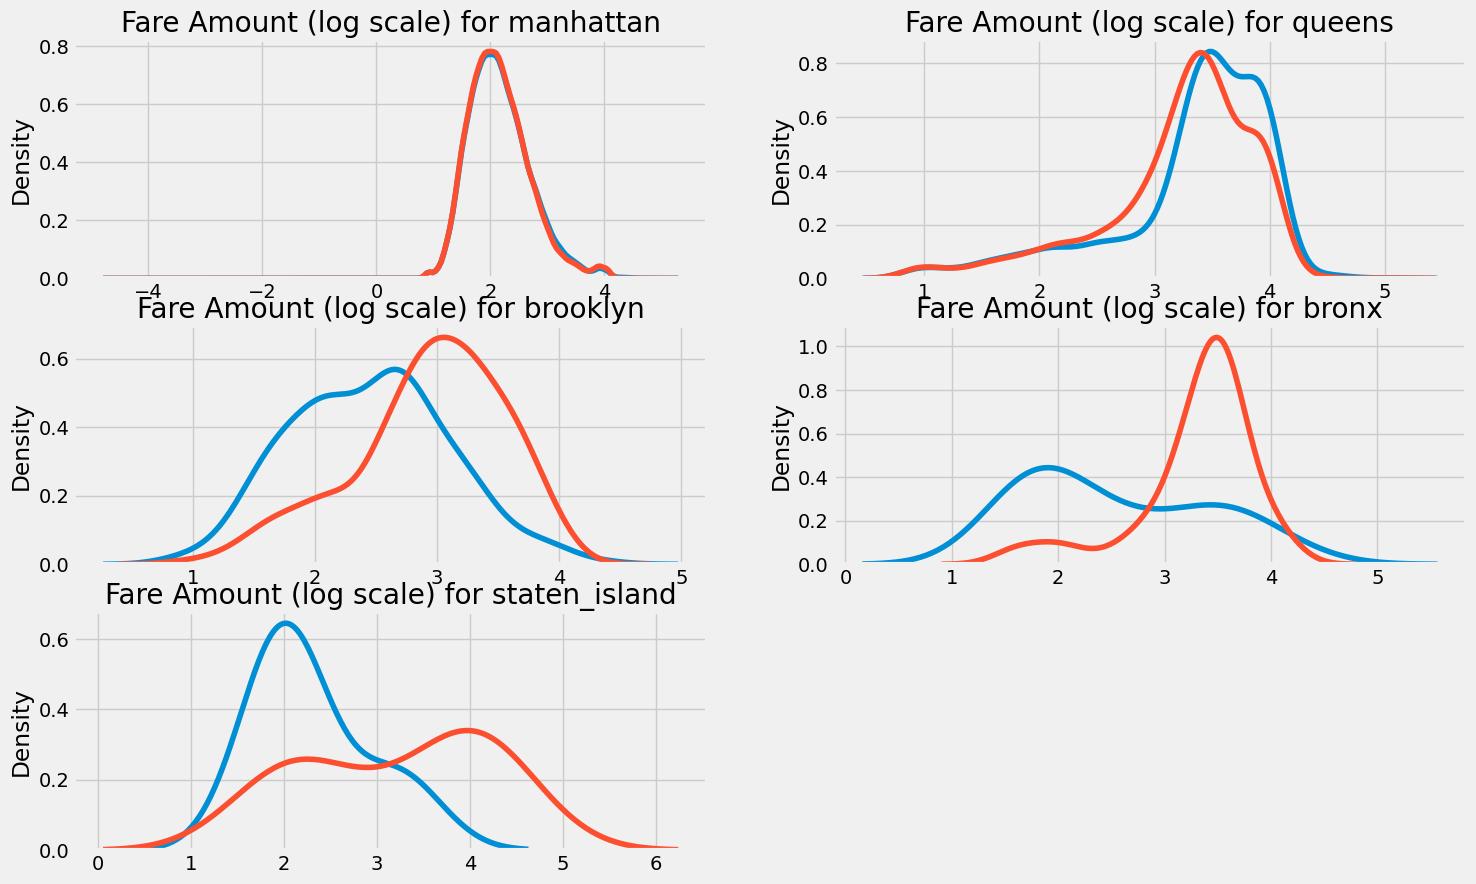

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Distribution of Fare Amount Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(train.loc[train['pickup_borough']==key,'amount'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(train.loc[train['dropoff_borough']==key,'amount'].values),label='Dropoff'+ key).set_title("Fare Amount (log scale) for "+key)
    
    i=i+1

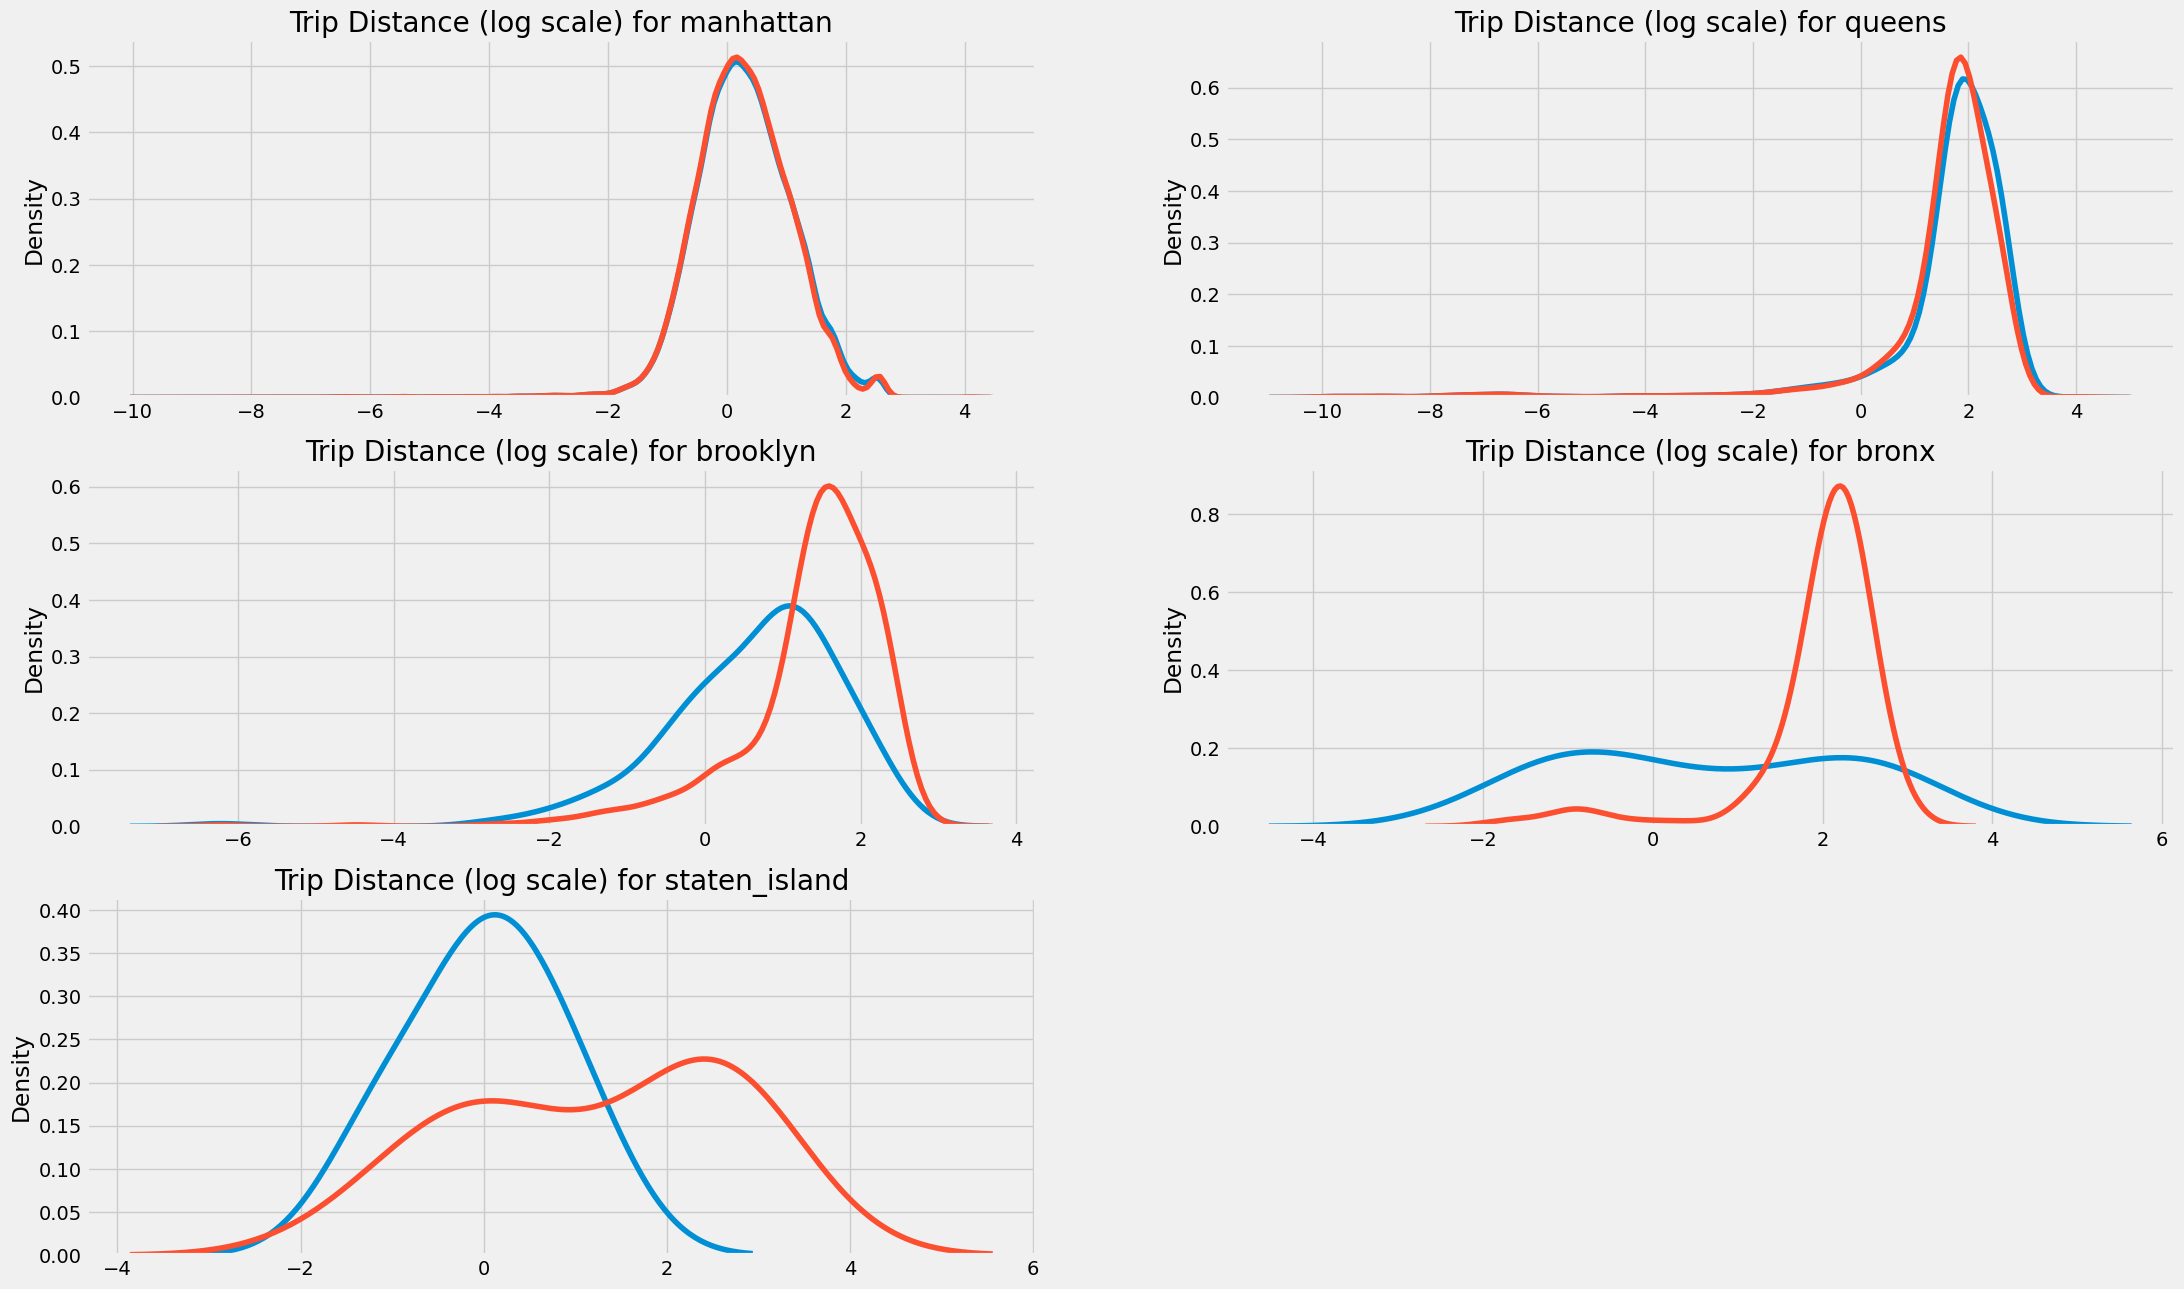

In [ ]:
plt.figure(figsize=(24,15))
plt.title("Distribution of Trip Distances Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(train.loc[train['pickup_borough']==key,'trip_distance'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(train.loc[train['dropoff_borough']==key,'trip_distance'].values),label='Dropoff'+ key).set_title("Trip Distance (log scale) for "+key)
    i=i+1

In [ ]:
lower_manhattan_boundary={'min_lng': -74.0194,
                          'min_lat':40.6997,
                          'max_lng':-73.9716,
                          'max_lat':40.7427}

def isLowerManhattan(lat,lng):
    if lat>=lower_manhattan_boundary['min_lat'] and lat<=lower_manhattan_boundary['max_lat'] and lng>=lower_manhattan_boundary['min_lng'] and lng<=lower_manhattan_boundary['max_lng']:
        return 1
    else:
        return 0

In [ ]:
train['is_pickup_lower_manhattan']=train.apply(lambda row:isLowerManhattan(row['latitude_of_pickup'],row['longitude_of_pickup']),axis=1)
train['is_dropoff_lower_manhattan']=train.apply(lambda row:isLowerManhattan(row['latitude_of_dropoff'],row['longitude_of_dropoff']),axis=1)

In [ ]:
manhattan=train.loc[(train['pickup_borough']=='manhattan') | (train['dropoff_borough']=='manhattan')]
manhattan.shape

(48147, 29)

Text(0.5, 1.0, 'Distribution of Fare Amount - Manhattan vs Lower Manhattan')

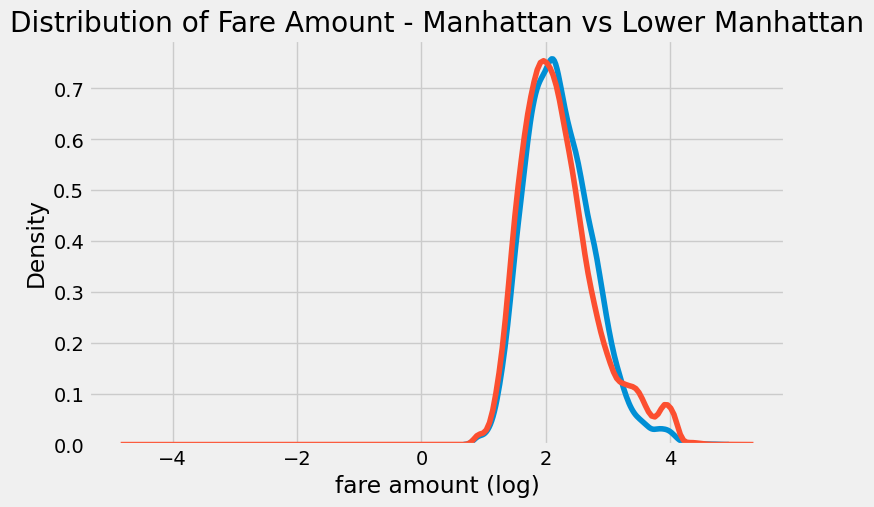

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(manhattan.loc[manhattan['is_pickup_lower_manhattan']==1,'amount'].values),label='Lower Manhattan Pickups')
sns.kdeplot(np.log(manhattan.loc[manhattan['is_pickup_lower_manhattan']==0,'amount'].values),label='Rest of Manhattan Pickups')
plt.xlabel("fare amount (log)")
plt.title("Distribution of Fare Amount - Manhattan vs Lower Manhattan")

Text(0.5, 1.0, 'Distribution of Fare Amount - Manhattan vs Lower Manhattan')

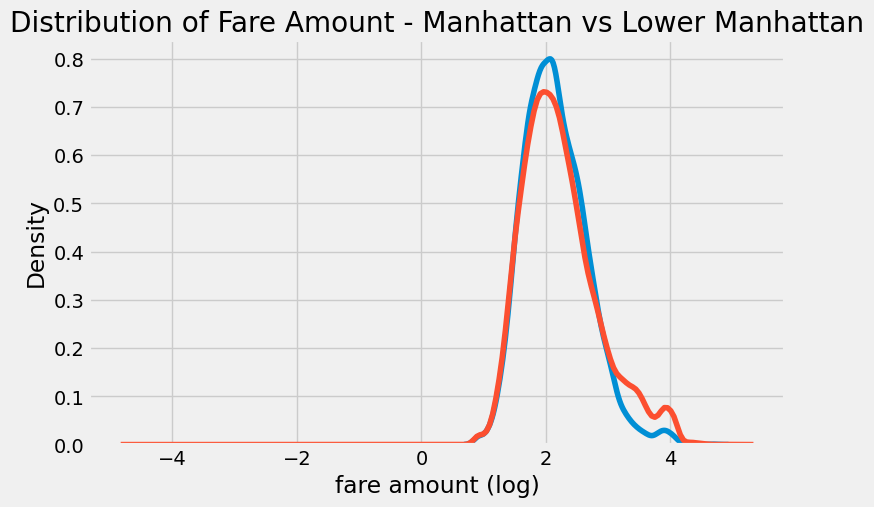

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(manhattan.loc[manhattan['is_dropoff_lower_manhattan']==1,'amount'].values),label='Lower Manhattan Dropoffs')
sns.kdeplot(np.log(manhattan.loc[manhattan['is_dropoff_lower_manhattan']==0,'amount'].values),label='Rest of Manhattan Dropoffs')
plt.xlabel("fare amount (log)")
plt.title("Distribution of Fare Amount - Manhattan vs Lower Manhattan")

Text(0.5, 1.0, 'Trip Distance vs Fare Amount (Lower Manhattan pickups)')

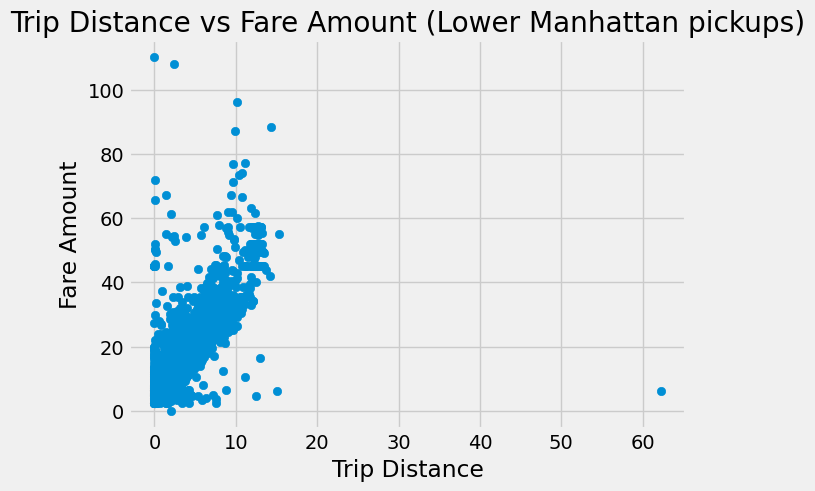

In [ ]:
plt.scatter(x=manhattan.loc[manhattan['is_pickup_lower_manhattan']==1,'trip_distance'].values,y=manhattan.loc[manhattan['is_pickup_lower_manhattan']==1,'amount'].values)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount (Lower Manhattan pickups)")

Text(0.5, 1.0, 'Trip Distance vs Fare Amount (Rest of Manhattan pickups)')

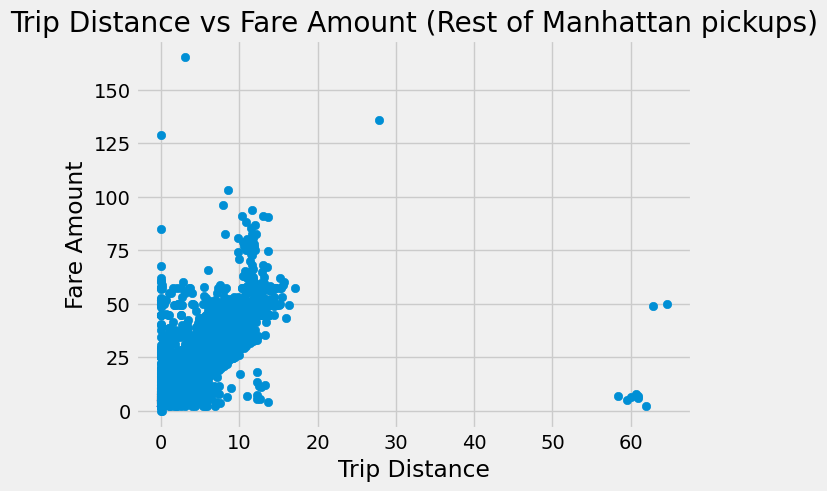

In [ ]:
plt.scatter(x=manhattan.loc[manhattan['is_pickup_lower_manhattan']==0,'trip_distance'].values,y=manhattan.loc[manhattan['is_pickup_lower_manhattan']==0,'amount'].values)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount (Rest of Manhattan pickups)")

Text(0.5, 1.0, 'Trip Distance vs Fare Amount (Lower Manhattan dropoffs)')

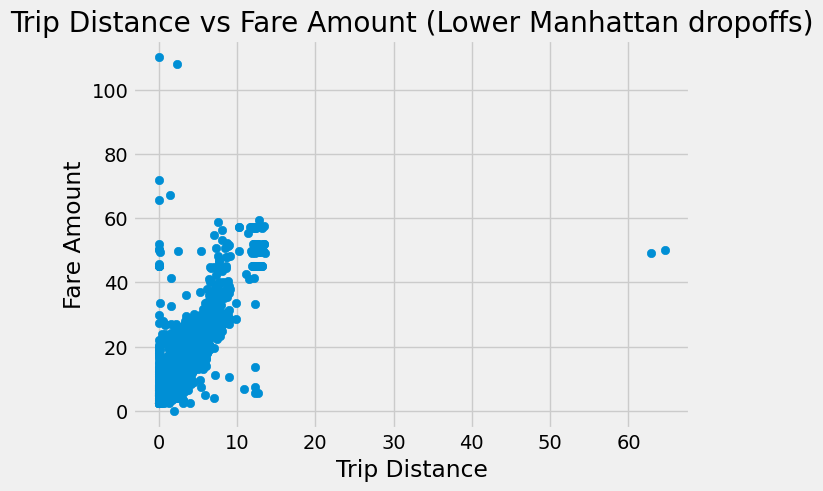

In [ ]:
plt.scatter(x=manhattan.loc[manhattan['is_dropoff_lower_manhattan']==1,'trip_distance'].values,y=manhattan.loc[manhattan['is_dropoff_lower_manhattan']==1,'amount'].values)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount (Lower Manhattan dropoffs)")

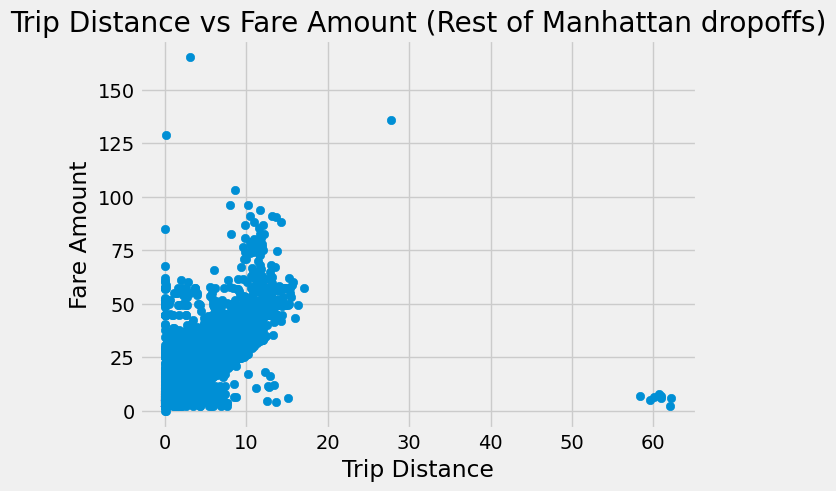

In [ ]:
plt.scatter(x=manhattan.loc[manhattan['is_dropoff_lower_manhattan']==0,'trip_distance'].values,y=manhattan.loc[manhattan['is_dropoff_lower_manhattan']==0,'amount'].values)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount (Rest of Manhattan dropoffs)")

del manhattan
del non_airport_long_trips
del non_airport

<Axes: xlabel='year_of_pickup', ylabel='Num_Trips'>

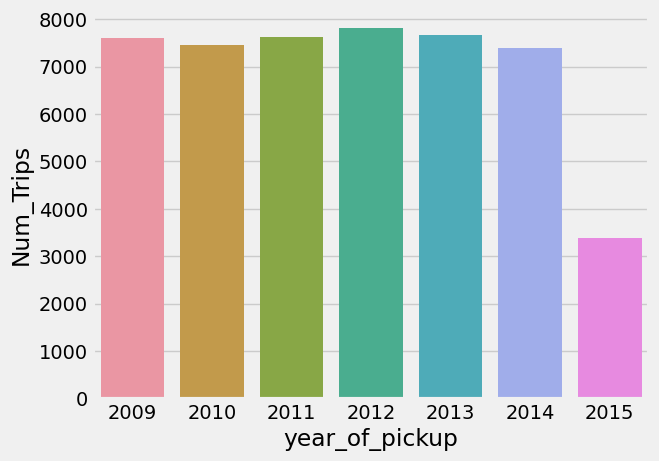

In [ ]:
trips_year=train.groupby(['year_of_pickup'])['unique_id'].count().reset_index().rename(columns={'unique_id':'Num_Trips'})
trips_year.head()
sns.barplot(x='year_of_pickup',y='Num_Trips',data=trips_year)

In [ ]:
trips_year_fareamount=train.groupby(['year_of_pickup'])['amount'].mean().reset_index().rename(columns={'amount':'avg_fare_amount'})

Text(0.5, 1.0, 'Avg Fare Amount over Years')

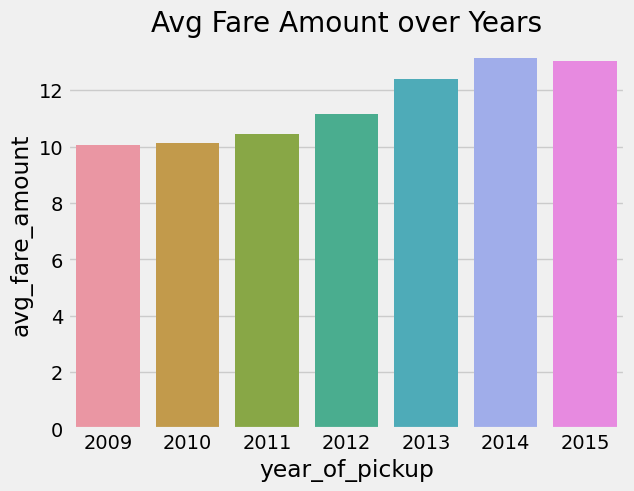

In [ ]:
sns.barplot(x='year_of_pickup',y='avg_fare_amount',data=trips_year_fareamount).set_title("Avg Fare Amount over Years")

In [ ]:
def groupandplot(data,groupby_key,value,aggregate='mean'):
    plt.figure(figsize=(16,10))
    agg_data=data.groupby([groupby_key])[value].agg(aggregate).reset_index().rename(columns={value:aggregate+'_'+value})
    plt.subplot(1,2,1)
    count_data=train.groupby([groupby_key])['unique_id'].count().reset_index().rename(columns={'unique_id':'Num_Trips'})
    sns.barplot(x=groupby_key,y='Num_Trips',data=count_data).set_title("Number of Trips vs "+groupby_key)
    
    plt.subplot(1,2,2)
    sns.barplot(x=groupby_key,y=aggregate+'_'+value,data=agg_data).set_title(aggregate+'_'+value+" vs "+groupby_key)


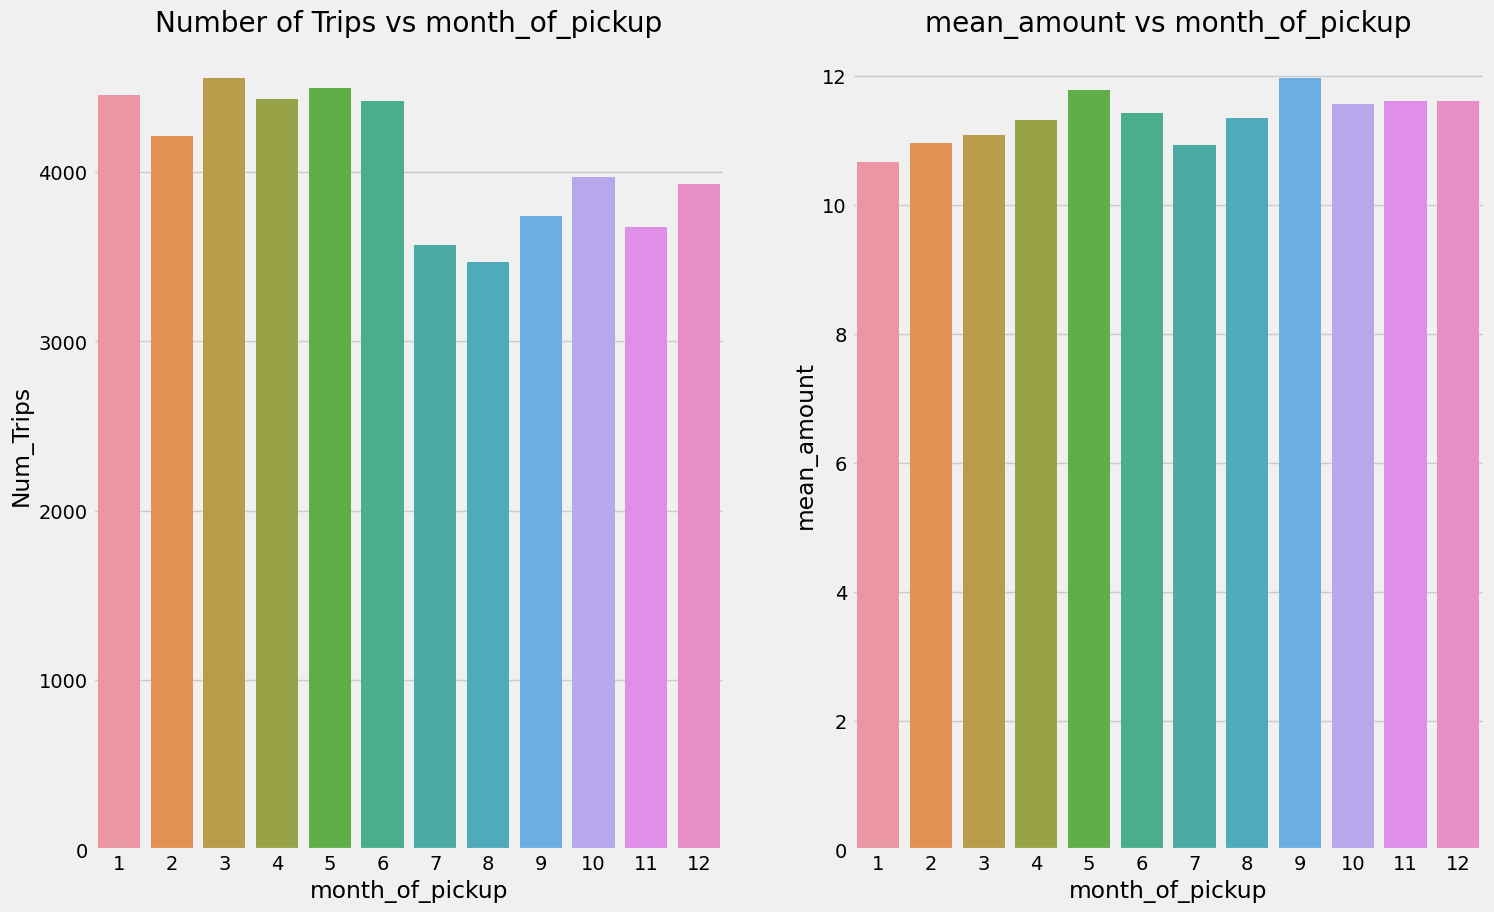

In [ ]:
groupandplot(train,'month_of_pickup','amount')

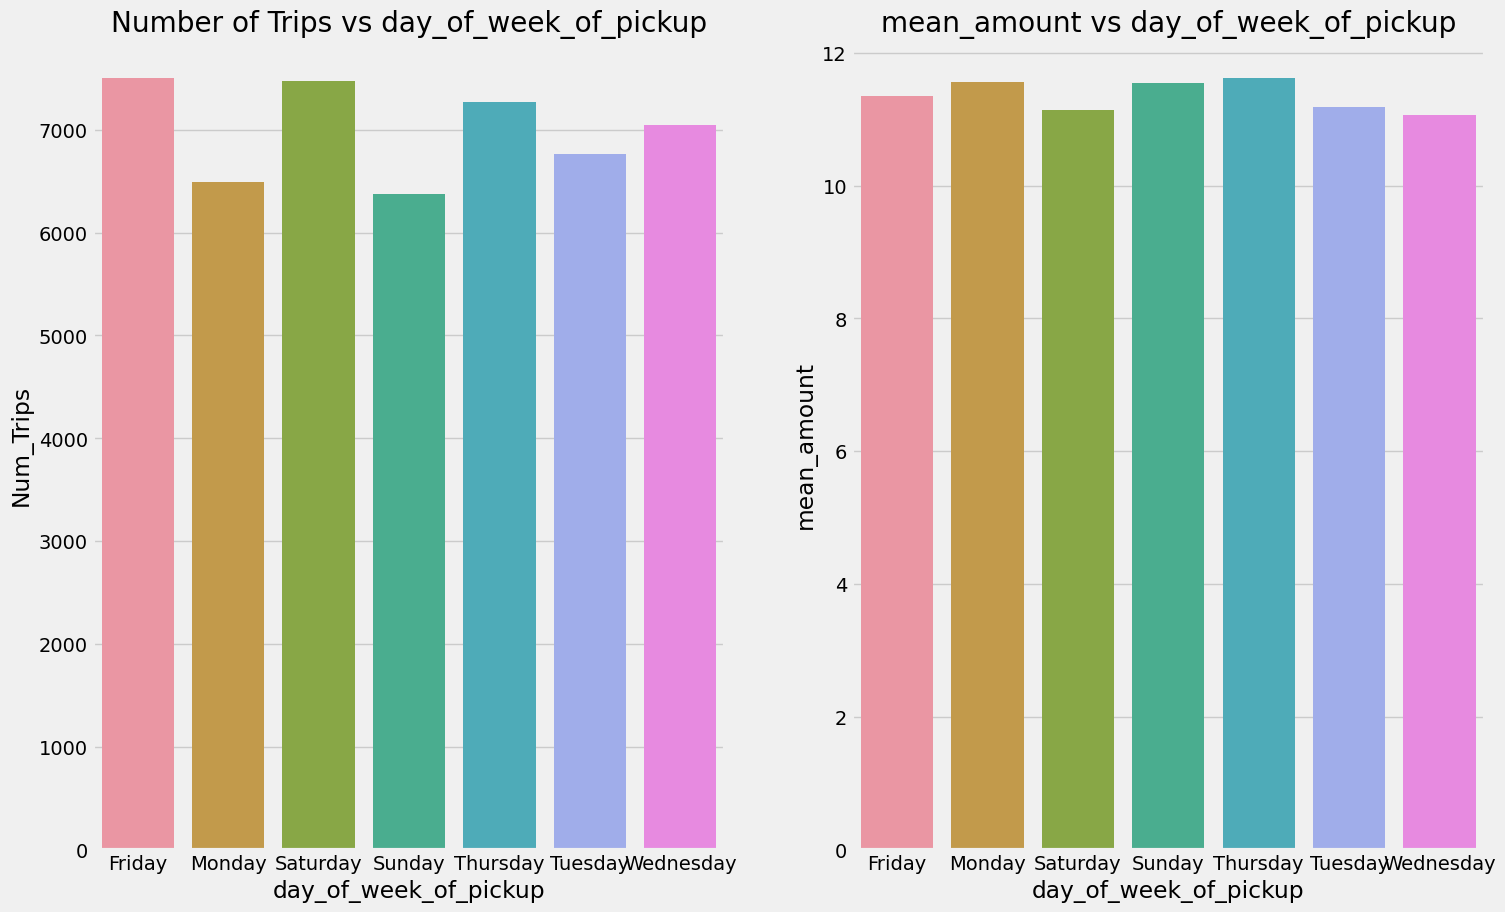

In [ ]:
groupandplot(train,'day_of_week_of_pickup','amount')

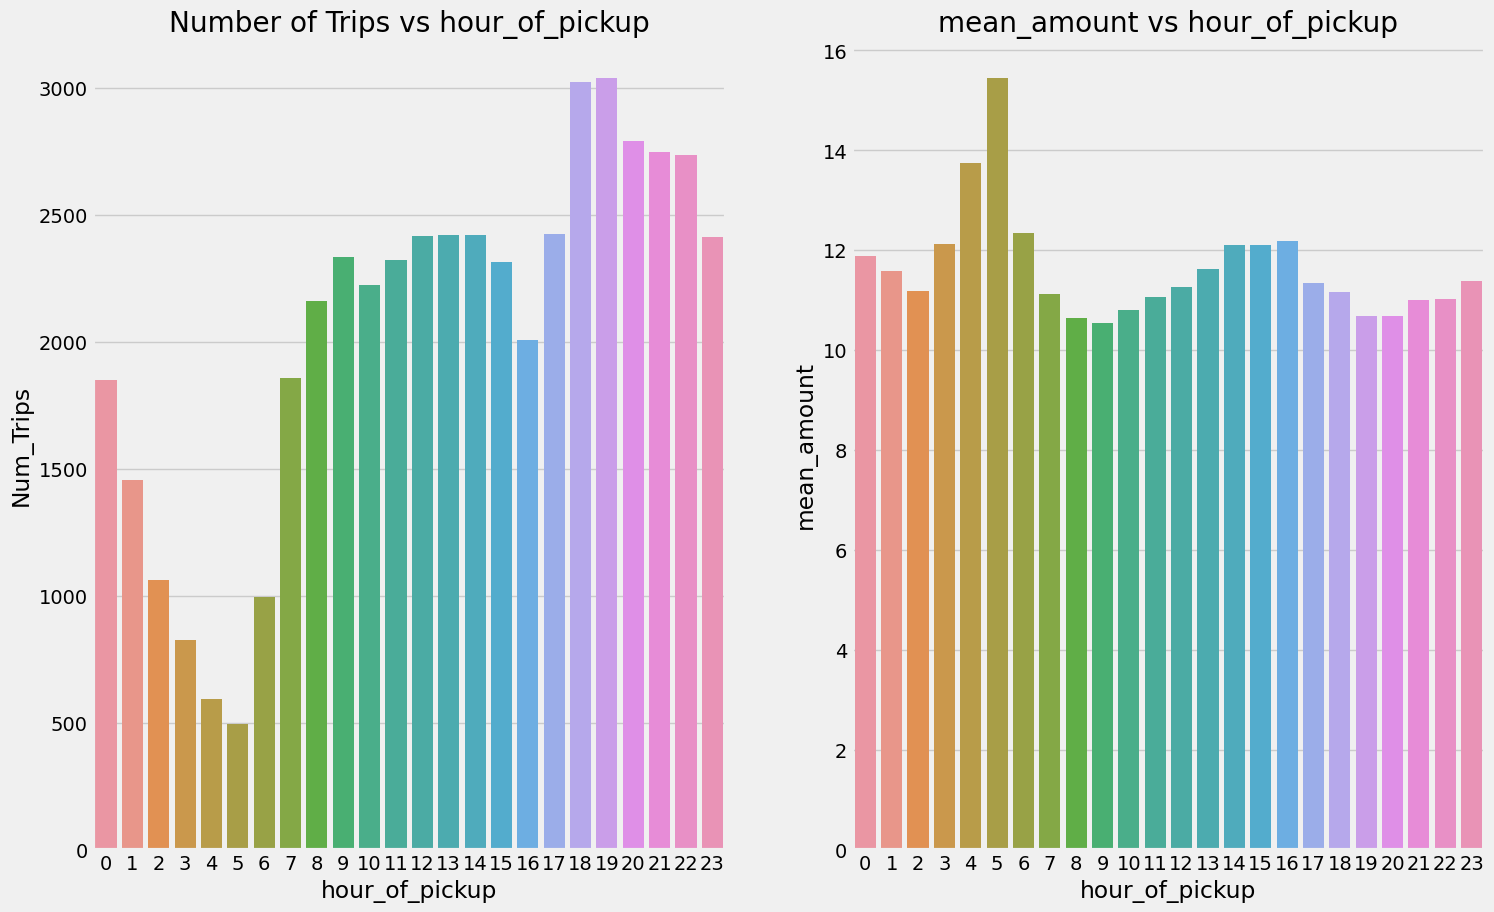

In [ ]:
groupandplot(train,'hour_of_pickup','amount')

In [ ]:
def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]

In [ ]:
train['day_of_week_of_pickup']=train['day_of_week_of_pickup'].apply(lambda x:encodeDays(x))

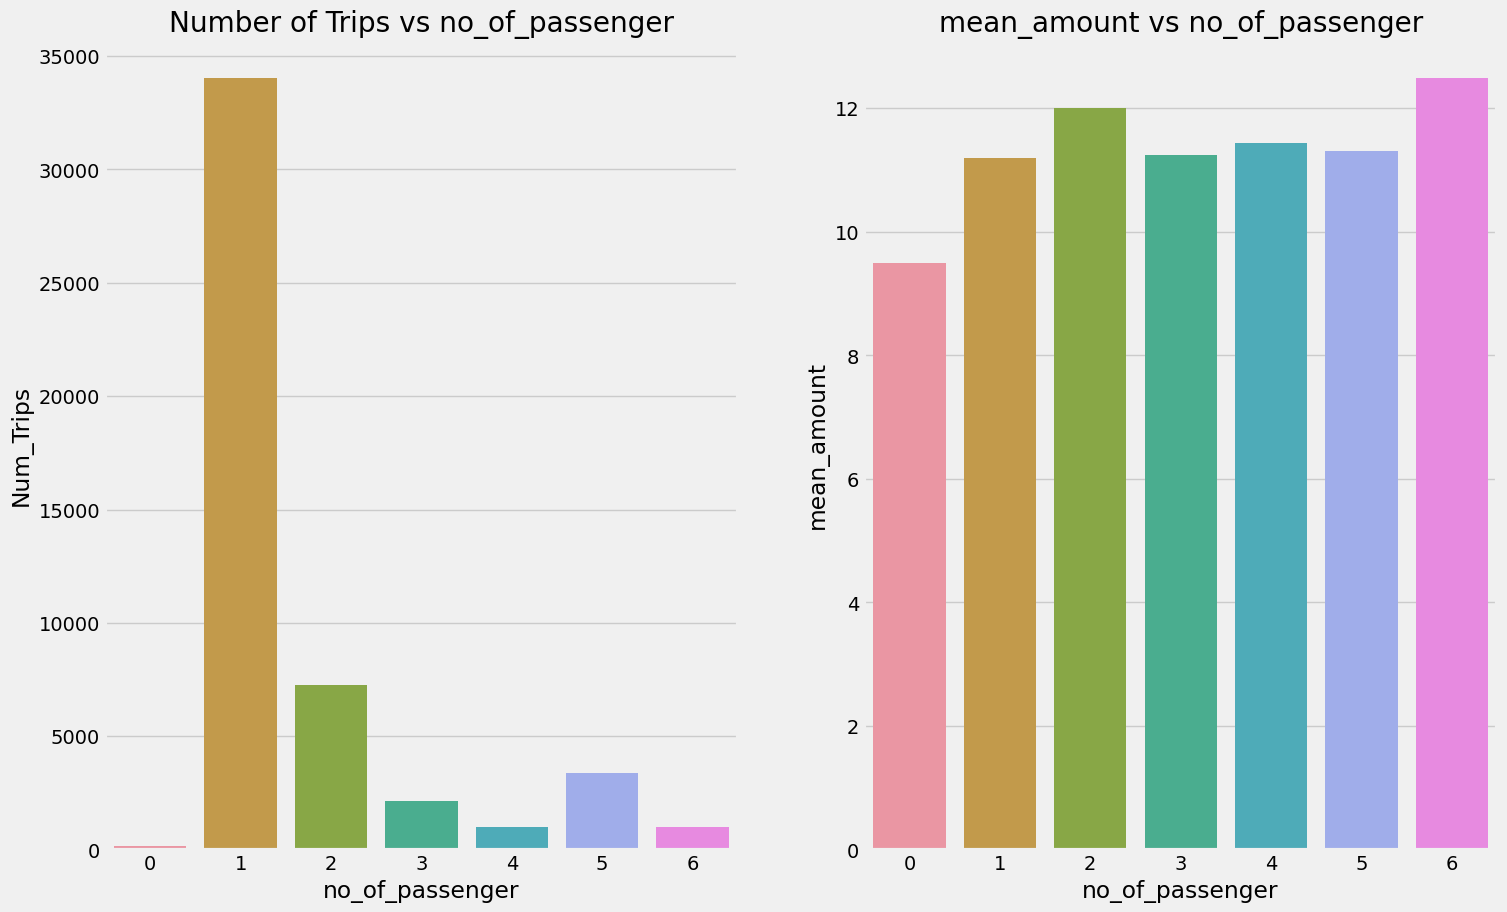

In [ ]:
groupandplot(train,'no_of_passenger','amount')

In [ ]:
print("Avg trip distance (in miles) when there are zero passengers",np.mean(train.loc[train['no_of_passenger']==0,'trip_distance'].values))

Avg trip distance (in miles) when there are zero passengers 1.9358234712649807


In [ ]:
train=train[train['no_of_passenger']<=8]

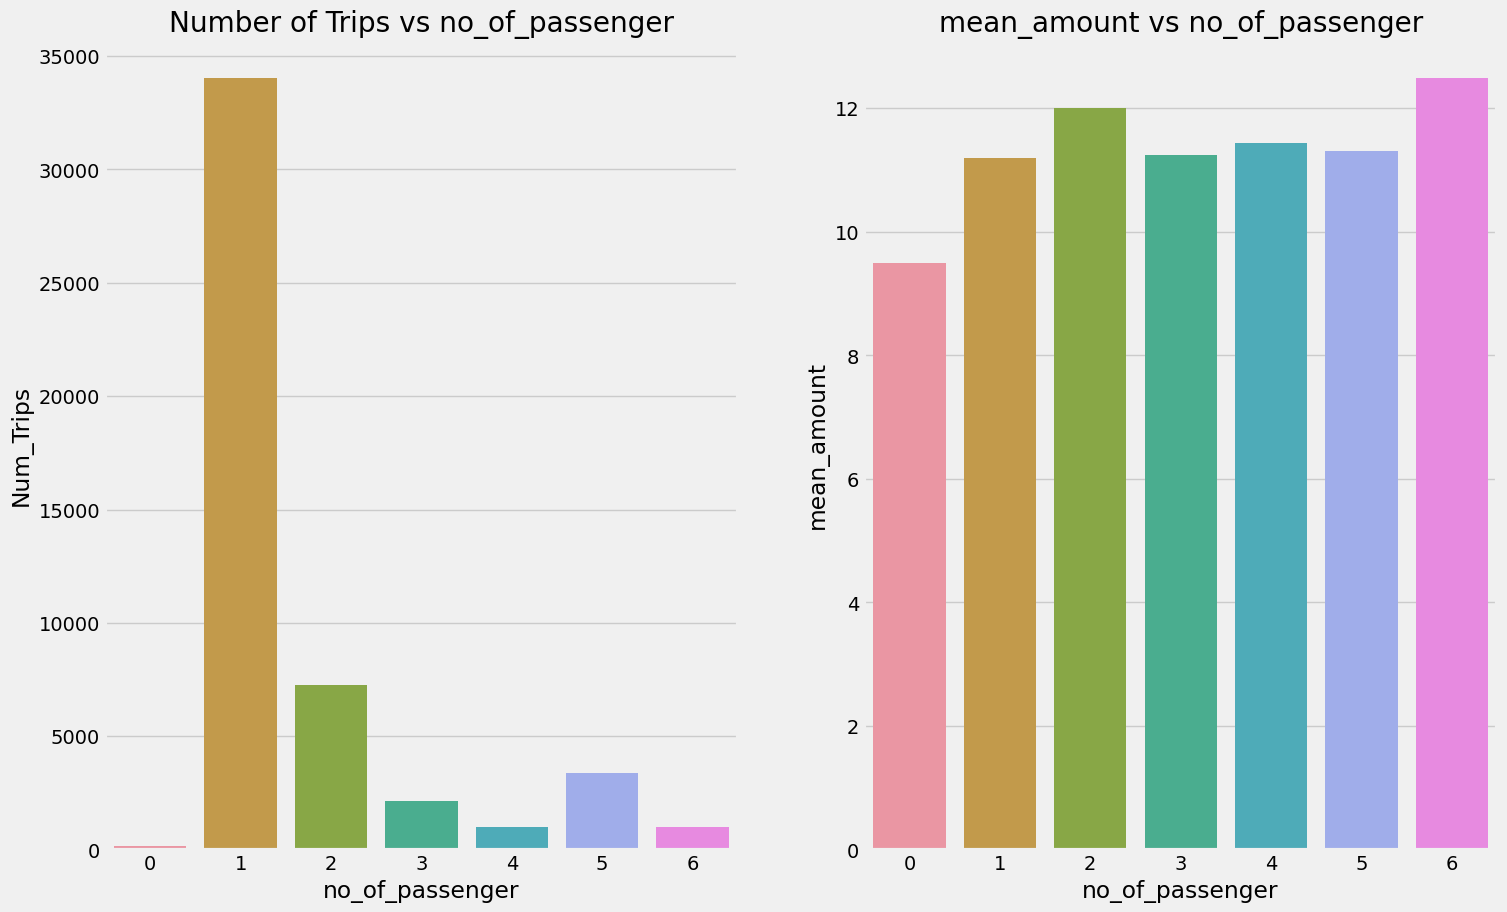

In [ ]:
groupandplot(train,'no_of_passenger','amount')

In [ ]:
train.to_csv("train_cleaned.csv",index=False)

In [ ]:
test=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
test['date_time_of_pickup']=pd.to_datetime(test['date_time_of_pickup'],format='%Y-%m-%d %H:%M:%S UTC')
test['date_of_pickup']= test['date_time_of_pickup'].dt.date
test['day_of_pickup']=test['date_time_of_pickup'].apply(lambda x:x.day)
test['hour_of_pickup']=test['date_time_of_pickup'].apply(lambda x:x.hour)
test['day_of_week_of_pickup']=test['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
test['month_of_pickup']=test['date_time_of_pickup'].apply(lambda x:x.month)
test['year_of_pickup']=test['date_time_of_pickup'].apply(lambda x:x.year)
test['is_pickup_JFK']=test.apply(lambda row:isAirport(row['latitude_of_pickup'],row['longitude_of_pickup'],'JFK'),axis=1)
test['is_dropoff_JFK']=test.apply(lambda row:isAirport(row['latitude_of_dropoff'],row['longitude_of_dropoff'],'JFK'),axis=1)
test['is_pickup_EWR']=test.apply(lambda row:isAirport(row['latitude_of_pickup'],row['longitude_of_pickup'],'EWR'),axis=1)
test['is_dropoff_EWR']=test.apply(lambda row:isAirport(row['latitude_of_dropoff'],row['longitude_of_dropoff'],'EWR'),axis=1)
test['is_pickup_la_guardia']=test.apply(lambda row:isAirport(row['latitude_of_pickup'],row['longitude_of_pickup'],'LaGuardia'),axis=1)
test['is_dropoff_la_guardia']=test.apply(lambda row:isAirport(row['latitude_of_dropoff'],row['longitude_of_dropoff'],'LaGuardia'),axis=1)
test['pickup_latitude_round3']=test['latitude_of_pickup'].apply(lambda x:round(x,3))
test['pickup_longitude_round3']=test['longitude_of_pickup'].apply(lambda x:round(x,3))
test['dropoff_latitude_round3']=test['latitude_of_dropoff'].apply(lambda x:round(x,3))
test['dropoff_longitude_round3']=test['longitude_of_dropoff'].apply(lambda x:round(x,3))
test['trip_distance']=test.apply(lambda row:distance(row['latitude_of_pickup'],row['latitude_of_dropoff'],row['longitude_of_pickup'],row['longitude_of_dropoff']),axis=1)
test['pickup_borough']=test.apply(lambda row:getBorough(row['latitude_of_pickup'],row['longitude_of_pickup']),axis=1)
test['dropoff_borough']=test.apply(lambda row:getBorough(row['latitude_of_dropoff'],row['longitude_of_dropoff']),axis=1)
test['is_pickup_lower_manhattan']=test.apply(lambda row:isLowerManhattan(row['latitude_of_pickup'],row['longitude_of_pickup']),axis=1)
test['is_dropoff_lower_manhattan']=test.apply(lambda row:isLowerManhattan(row['latitude_of_dropoff'],row['longitude_of_dropoff']),axis=1)
test['day_of_week_of_pickup']=test['day_of_week_of_pickup'].apply(lambda x:encodeDays(x))
print("Shape of test data", test.shape)

test.to_csv("test_cleaned.csv",index=False)


Shape of test data (50000, 29)
